### Analyze the Spread of Novel CoronaVirus 
#### [Data Source: Johns Hopkins University](https://docs.google.com/spreadsheets/d/1yZv9w9zRKwrGTaR-YzmAqMefw4wMlaXocejdxZaTs6w/htmlview?usp=drive_web&ouid=110279678181267528108&sle=true)

In [1]:
import pandas as pd

#### Load all sheets in the underlying file

In [2]:
file_path = 'Novel Coronavirus (2019-nCoV) Cases, provided by JHU CSSE.xlsx'

In [3]:
raw_df = pd.concat(pd.read_excel(file_path, sheet_name= None), ignore_index = True, sort=True)

In [4]:
# Merge duplicate columns with different names

main_df = raw_df

main_df.loc[main_df.Deaths.isna(),'Deaths'] =  main_df.loc[main_df.Deaths.isna(),'Demised']

main_df.loc[main_df['Country/Region'].isna(),'Country/Region'] =  main_df.loc[main_df['Country/Region'].isna(),'Country']

main_df.loc[main_df['Last Update'].isna(),'Last Update'] = main_df.loc[main_df['Last Update'].isna(),'Date last updated']

main_df = main_df.loc[:, ~main_df.columns.isin(['Demised' , 'Country' , 'Date last updated'])]
main_df

,Confirmed,Country/Region,Deaths,Last Update,Province/State,Recovered,Suspected
0,7153.0,Mainland China,249.0,2020-01-31 19:00:00,Hubei,169.0,NaN
1,537.0,Mainland China,NaN,2020-01-31 19:00:00,Zhejiang,14.0,NaN
2,436.0,Mainland China,NaN,2020-01-31 19:00:00,Guangdong,10.0,NaN
3,352.0,Mainland China,2.0,2020-01-31 19:00:00,Henan,3.0,NaN
4,332.0,Mainland China,NaN,2020-01-31 19:00:00,Hunan,3.0,NaN
...,...,...,...,...,...,...,...
1120,NaN,China,NaN,2020-01-21 00:00:00,Heilongjiang,NaN,1.0
1121,1.0,Japan,NaN,2020-01-21 00:00:00,NaN,NaN,NaN
1122,2.0,Thailand,NaN,2020-01-21 00:00:00,NaN,NaN,NaN
1123,1.0,South Korea,NaN,2020-01-21 00:00:00,NaN,NaN,NaN


In [5]:
# merge duplicate country names
main_df['Country/Region'] = main_df['Country/Region'].str.replace(r'^China','Mainland China')
main_df['Country/Region'] = main_df['Country/Region'].str.replace(r'United States','US')

main_df.loc[main_df['Province/State'].isna(), 'Province/State'] = main_df.loc[main_df['Province/State'].isna(), 'Country/Region']

main_df['day'] = main_df['Last Update'].dt.day
main_df['month'] = main_df['Last Update'].dt.month
main_df = main_df.fillna(0) # will take max value in the next step

/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [6]:
clean_df =main_df.groupby(['Country/Region','Province/State','month','day']).agg({'Last Update':'max',
                                                                  'Confirmed':'max',
                                                                  'Suspected':'max',
                                                                  'Recovered':'max',
                                                                  'Deaths':'max'}).reset_index()

In [7]:
clean_df['period'] = pd.to_datetime('2020-' + clean_df.month.astype(str) + '-' + clean_df.day.astype(str))

In [8]:
clean_df

,Country/Region,Province/State,month,day,Last Update,Confirmed,Suspected,Recovered,Deaths,period
0,Australia,Australia,1,23,2020-01-23 12:00:00,0.0,1.0,0.0,0.0,2020-01-23
1,Australia,Australia,1,25,2020-01-25 12:00:00,4.0,0.0,0.0,0.0,2020-01-25
2,Australia,Australia,1,26,2020-01-26 23:00:00,4.0,0.0,0.0,0.0,2020-01-26
3,Australia,Australia,1,27,2020-01-27 09:00:00,5.0,0.0,0.0,0.0,2020-01-27
4,Australia,New South Wales,1,27,2020-01-27 20:30:00,4.0,0.0,0.0,0.0,2020-01-27
...,...,...,...,...,...,...,...,...,...,...
521,Vietnam,Vietnam,1,27,2020-01-27 20:30:00,2.0,0.0,0.0,0.0,2020-01-27
522,Vietnam,Vietnam,1,28,2020-01-28 23:00:00,2.0,0.0,0.0,0.0,2020-01-28
523,Vietnam,Vietnam,1,29,2020-01-29 21:00:00,2.0,0.0,0.0,0.0,2020-01-29
524,Vietnam,Vietnam,1,30,2020-01-30 21:30:00,2.0,0.0,0.0,0.0,2020-01-30


#### Some baisc checks

In [9]:
clean_df[clean_df['Province/State'] =='Hubei'].plot.line(x='period', y='Confirmed')

In [10]:
clean_df['Last Update'].value_counts().sort_index()

2020-01-21 00:00:00    27
2020-01-22 12:00:00    38
2020-01-23 12:00:00    46
2020-01-24 12:00:00    40
2020-01-24 16:00:00     1
2020-01-25 12:00:00    42
2020-01-25 22:00:00     2
2020-01-26 23:00:00    47
2020-01-27 09:00:00     1
2020-01-27 20:30:00    52
2020-01-28 18:00:00     1
2020-01-28 23:00:00    51
2020-01-29 21:00:00    56
2020-01-30 21:30:00    59
2020-01-31 19:00:00    63
Name: Last Update, dtype: int64

In [11]:
main_df.loc[main_df['Last Update'] == '2020-01-31 19:00:00','Country/Region'].value_counts()

Mainland China          31
US                       4
Australia                3
Canada                   2
Sweden                   1
Finland                  1
Malaysia                 1
Sri Lanka                1
Vietnam                  1
Philippines              1
Cambodia                 1
United Arab Emirates     1
Germany                  1
France                   1
India                    1
Nepal                    1
Spain                    1
Macau                    1
Japan                    1
Taiwan                   1
South Korea              1
Thailand                 1
Italy                    1
Russia                   1
UK                       1
Hong Kong                1
Singapore                1
Name: Country/Region, dtype: int64

In [12]:
clean_df[clean_df['Confirmed'] >= 10]

,Country/Region,Province/State,month,day,Last Update,Confirmed,Suspected,Recovered,Deaths,period
56,Hong Kong,Hong Kong,1,29,2020-01-29 21:00:00,10.0,0.0,0.0,0.0,2020-01-29
57,Hong Kong,Hong Kong,1,30,2020-01-30 21:30:00,12.0,0.0,0.0,0.0,2020-01-30
58,Hong Kong,Hong Kong,1,31,2020-01-31 19:00:00,13.0,0.0,0.0,0.0,2020-01-31
72,Japan,Japan,1,29,2020-01-29 21:00:00,11.0,0.0,1.0,0.0,2020-01-29
73,Japan,Japan,1,30,2020-01-30 21:30:00,11.0,0.0,1.0,0.0,2020-01-30
...,...,...,...,...,...,...,...,...,...,...
470,Taiwan,Taiwan,1,31,2020-01-31 19:00:00,10.0,0.0,0.0,0.0,2020-01-31
478,Thailand,Thailand,1,28,2020-01-28 23:00:00,14.0,0.0,5.0,0.0,2020-01-28
479,Thailand,Thailand,1,29,2020-01-29 21:00:00,14.0,0.0,5.0,0.0,2020-01-29
480,Thailand,Thailand,1,30,2020-01-30 21:30:00,14.0,0.0,5.0,0.0,2020-01-30


#### Some Analysis

##### Growth rate of confirmed cases

In [13]:
clean_df['Confirmed_lag'] = clean_df.groupby(['Province/State']).Confirmed.shift(1)

clean_df['growth number daily'] =  clean_df.Confirmed - clean_df.Confirmed_lag

clean_df['growth rate daily'] = clean_df.Confirmed / clean_df.Confirmed_lag - 1

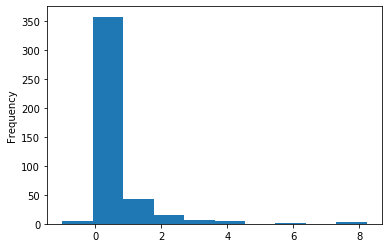

In [14]:
clean_df[clean_df.Confirmed_lag > 0]['growth rate daily'].plot.hist()

In [15]:
clean_df['growth rate daily'].describe()

count    450.000000
mean            inf
std             NaN
min       -1.000000
25%        0.000000
50%        0.251697
75%        0.641234
max             inf
Name: growth rate daily, dtype: float64

In [16]:
# focus on cases where base is above 10

In [49]:
heavy_affect_df = clean_df[clean_df['Confirmed_lag'] >= 8]
heavy_affect_df.describe()

,month,day,Confirmed,Suspected,Recovered,Deaths,Confirmed_lag,growth number daily,growth rate daily,recover rate
count,216.0,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,215.000000
mean,1.0,27.962963,210.291667,2.120370,4.199074,4.898148,161.083333,49.208333,0.417646,0.020715
std,0.0,2.387666,758.285375,11.210226,16.942645,27.255020,592.196332,178.208600,0.696755,0.053215
min,1.0,21.000000,0.000000,0.000000,0.000000,0.000000,8.000000,-13.000000,-1.000000,0.000000
25%,1.0,26.000000,22.000000,0.000000,0.000000,0.000000,15.000000,4.000000,0.115385,0.000000
50%,1.0,28.000000,54.000000,0.000000,0.000000,0.000000,38.000000,11.000000,0.266107,0.000000
75%,1.0,30.000000,128.000000,0.000000,2.000000,0.000000,101.000000,25.000000,0.500000,0.023441
max,1.0,31.000000,7153.000000,117.000000,169.000000,249.000000,5806.000000,1347.000000,8.222222,0.368421


In [50]:
heavy_affect_df['rank by area'] = heavy_affect_df.groupby('Province/State')['period'].rank()

/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
growth_df = heavy_affect_df.pivot_table(values = 'growth rate daily', index = 'rank by area', columns='Province/State').reset_index()
growth_df

Province/State,rank by area,Anhui,Beijing,Chongqing,Fujian,Gansu,Guangdong,Guangxi,Guizhou,Hainan,...,Shanghai,Shanxi,Sichuan,Singapore,Taiwan,Thailand,Tianjin,Xinjiang,Yunnan,Zhejiang
0,1.0,0.666667,0.400000,2.000000,0.800000,0.357143,0.529412,0.434783,0.000000,1.375000,...,0.000000,0.444444,0.875000,0.0,0.000000,0.000000,0.625000,0.076923,0.727273,1.700000
1,2.0,3.000000,0.571429,1.777778,0.944444,0.263158,0.230769,0.393939,0.333333,0.157895,...,0.777778,0.538462,1.933333,0.6,0.125000,0.750000,0.076923,0.214286,0.368421,0.592593
2,3.0,0.166667,0.636364,0.466667,0.685714,0.083333,0.656250,0.108696,0.250000,0.500000,...,0.250000,0.350000,0.568182,NaN,0.111111,0.000000,0.642857,0.000000,0.692308,1.418605
3,4.0,0.514286,0.416667,0.200000,0.389831,0.115385,0.849057,0.137255,0.933333,0.303030,...,1.000000,0.296296,0.304348,NaN,NaN,0.000000,0.086957,NaN,0.250000,0.230769
4,5.0,0.433962,0.333333,0.113636,0.231707,0.206897,0.489796,0.344828,NaN,0.000000,...,0.325000,0.114286,0.200000,NaN,NaN,0.357143,0.080000,NaN,0.381818,0.351562
5,6.0,0.315789,0.176471,0.122449,0.000000,NaN,0.034247,0.115385,NaN,0.162791,...,0.245283,0.205128,0.314815,NaN,NaN,NaN,0.185185,NaN,0.092105,0.710983
6,7.0,0.185000,0.137500,0.248485,0.188119,NaN,0.596026,0.011494,NaN,0.160000,...,0.212121,NaN,0.246479,NaN,NaN,NaN,0.000000,NaN,NaN,0.445946
7,8.0,0.000000,0.219780,0.155340,NaN,NaN,0.290456,NaN,NaN,NaN,...,0.262500,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.254673
8,9.0,NaN,0.090090,NaN,NaN,NaN,0.263666,NaN,NaN,NaN,...,0.267327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001862
9,10.0,NaN,0.148760,NaN,NaN,NaN,0.109415,NaN,NaN,NaN,...,0.195312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


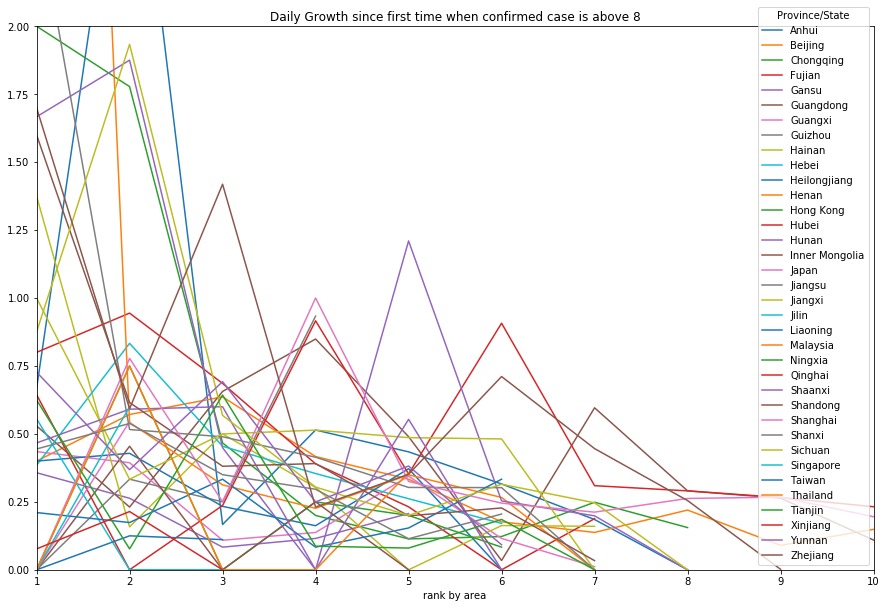

In [52]:
growth_df.set_index('rank by area').plot(figsize =(15, 10), 
                                         title ='Daily Growth since first time when confirmed case is above 8',
                                         ylim =(0, 2))

In [53]:
# cumulative growth rate
earliest_df = heavy_affect_df. \
            groupby(['Province/State']). \
            agg({'Confirmed':'min'}).reset_index().rename(columns ={'Confirmed': 'base'})

earliest_df

,Province/State,base
0,Anhui,15.0
1,Beijing,14.0
2,Chongqing,27.0
3,Fujian,18.0
4,Gansu,19.0
5,Guangdong,26.0
6,Guangxi,33.0
7,Guizhou,9.0
8,Hainan,19.0
9,Hebei,18.0


In [54]:
heavy_affect_df = pd.merge(heavy_affect_df, earliest_df, how = 'left', left_on = 'Province/State', right_on = 'Province/State')
heavy_affect_df

,Country/Region,Province/State,month,day,Last Update,Confirmed,Suspected,Recovered,Deaths,period,Confirmed_lag,growth number daily,growth rate daily,recover rate,rank by area,base
0,Hong Kong,Hong Kong,1,27,2020-01-27 20:30:00,8.0,0.0,0.0,0.0,2020-01-27,8.0,0.0,0.000000,0.000000,2.0,0.0
1,Hong Kong,Hong Kong,1,28,2020-01-28 23:00:00,8.0,0.0,0.0,0.0,2020-01-28,8.0,0.0,0.000000,0.000000,3.0,0.0
2,Hong Kong,Hong Kong,1,29,2020-01-29 21:00:00,10.0,0.0,0.0,0.0,2020-01-29,8.0,2.0,0.250000,0.000000,4.0,0.0
3,Hong Kong,Hong Kong,1,30,2020-01-30 21:30:00,12.0,0.0,0.0,0.0,2020-01-30,10.0,2.0,0.200000,0.000000,5.0,0.0
4,Hong Kong,Hong Kong,1,31,2020-01-31 19:00:00,13.0,0.0,0.0,0.0,2020-01-31,12.0,1.0,0.083333,0.000000,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,Thailand,Thailand,1,27,2020-01-27 20:30:00,8.0,0.0,2.0,0.0,2020-01-27,8.0,0.0,0.000000,0.250000,1.0,8.0
212,Thailand,Thailand,1,28,2020-01-28 23:00:00,14.0,0.0,5.0,0.0,2020-01-28,8.0,6.0,0.750000,0.357143,2.0,8.0
213,Thailand,Thailand,1,29,2020-01-29 21:00:00,14.0,0.0,5.0,0.0,2020-01-29,14.0,0.0,0.000000,0.357143,3.0,8.0
214,Thailand,Thailand,1,30,2020-01-30 21:30:00,14.0,0.0,5.0,0.0,2020-01-30,14.0,0.0,0.000000,0.357143,4.0,8.0


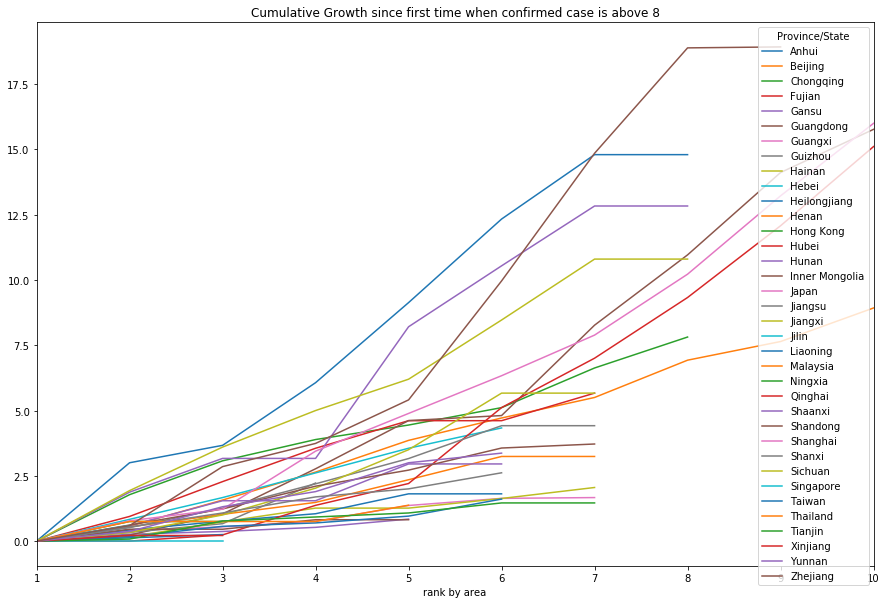

In [55]:
heavy_affect_df['cumulative growth'] = heavy_affect_df['Confirmed']/ heavy_affect_df['base'] - 1
cmlt_growth_df = heavy_affect_df.pivot_table(columns ='Province/State', index= 'rank by area', values='cumulative growth')
cmlt_growth_df.plot.line(figsize =(15, 10), 
                                         title ='Cumulative Growth since first time when confirmed case is above 8')
                                         #ylim =(0, 2)#)

In [70]:
cmlt_growth_df.max().sort_values().index

Index(['Jilin', 'Qinghai', 'Malaysia', 'Xinjiang', 'Taiwan', 'Japan',
       'Singapore', 'Ningxia', 'Inner Mongolia', 'Gansu', 'Thailand',
       'Tianjin', 'Liaoning', 'Guangxi', 'Heilongjiang', 'Hainan', 'Guizhou',
       'Shanxi', 'Shaanxi', 'Henan', 'Yunnan', 'Shandong', 'Hebei', 'Jiangsu',
       'Fujian', 'Jiangxi', 'Chongqing', 'Beijing', 'Sichuan', 'Hunan',
       'Anhui', 'Hubei', 'Guangdong', 'Shanghai', 'Zhejiang', 'Hong Kong'],
      dtype='object', name='Province/State')

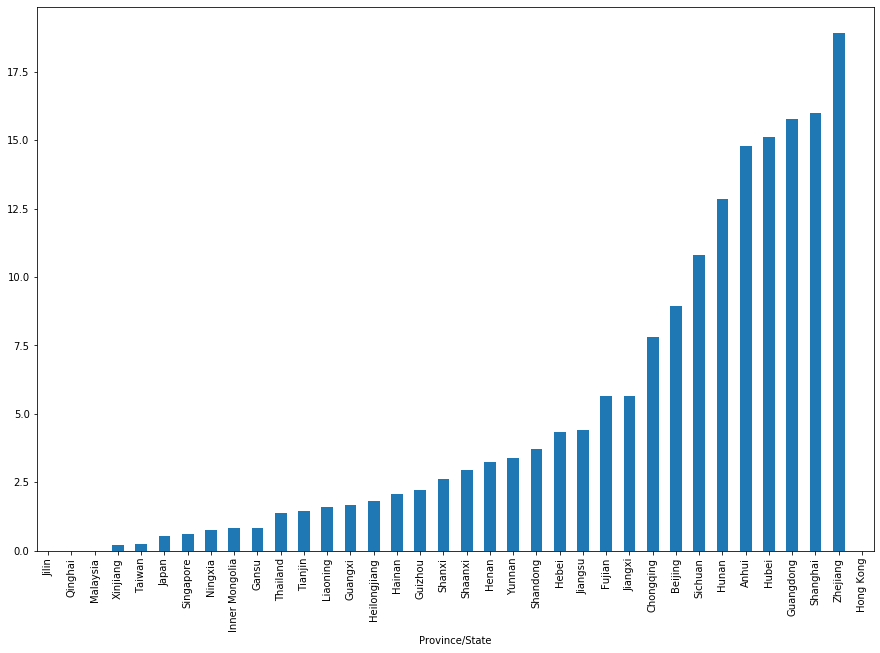

In [67]:
cmlt_growth_df.max().sort_values().plot.bar(figsize =(15,10))

In [72]:
# the following provinces/states have the highest cumulative growth
cmlt_growth_df[['Sichuan', 'Hunan','Anhui', 'Hubei', 'Guangdong', 'Shanghai', 'Zhejiang']]

Province/State,Sichuan,Hunan,Anhui,Hubei,Guangdong,Shanghai,Zhejiang
rank by area,,,,,,,
1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2.0,1.933333,1.875000,3.000000,0.000000,0.230769,0.777778,0.592593
3.0,3.600000,3.166667,3.666667,0.236486,1.038462,1.222222,2.851852
4.0,5.000000,3.166667,6.066667,1.369369,2.769231,3.444444,3.740741
5.0,6.200000,8.208333,9.133333,2.204955,4.615385,4.888889,5.407407
6.0,8.466667,10.541667,12.333333,5.112613,4.807692,6.333333,9.962963
7.0,10.800000,12.833333,14.800000,7.004505,8.269231,7.888889,14.851852
8.0,10.800000,12.833333,14.800000,9.328829,10.961538,10.222222,18.888889
9.0,NaN,NaN,NaN,12.076577,14.115385,13.222222,18.925926


##### Recover rate using the latest data available

In [26]:
clean_df['recover rate'] = clean_df.Recovered / clean_df.Confirmed
latest_df = clean_df.groupby(['Province/State']).agg({'Last Update': 'max'}).reset_index()
latest_df

,Province/State,Last Update
0,Anhui,2020-01-31 19:00:00
1,Arizona,2020-01-31 19:00:00
2,Australia,2020-01-27 09:00:00
3,Bavaria,2020-01-31 19:00:00
4,Beijing,2020-01-31 19:00:00
...,...,...
64,Vietnam,2020-01-31 19:00:00
65,Washington,2020-01-31 19:00:00
66,Xinjiang,2020-01-31 19:00:00
67,Yunnan,2020-01-31 19:00:00


In [27]:
latest_df = pd.merge(clean_df, latest_df, how = 'right', left_on = ['Province/State', 'Last Update'], right_on = ['Province/State', 'Last Update'])

In [28]:
latest_df

,Country/Region,Province/State,month,day,Last Update,Confirmed,Suspected,Recovered,Deaths,period,Confirmed_lag,growth number daily,growth rate daily,recover rate
0,Australia,Australia,1,27,2020-01-27 09:00:00,5.0,0.0,0.0,0.0,2020-01-27,4.0,1.0,0.25,0.0
1,Australia,New South Wales,1,31,2020-01-31 19:00:00,4.0,0.0,2.0,0.0,2020-01-31,4.0,0.0,0.00,0.5
2,Australia,Queensland,1,31,2020-01-31 19:00:00,3.0,0.0,0.0,0.0,2020-01-31,3.0,0.0,0.00,0.0
3,Australia,Victoria,1,31,2020-01-31 19:00:00,3.0,0.0,0.0,0.0,2020-01-31,2.0,1.0,0.50,0.0
4,Brazil,Brazil,1,23,2020-01-23 12:00:00,0.0,1.0,0.0,0.0,2020-01-23,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,US,Chicago,1,24,2020-01-24 12:00:00,1.0,0.0,0.0,0.0,2020-01-24,NaN,NaN,NaN,0.0
65,US,Illinois,1,31,2020-01-31 19:00:00,2.0,0.0,0.0,0.0,2020-01-31,2.0,0.0,0.00,0.0
66,US,Washington,1,31,2020-01-31 19:00:00,1.0,0.0,0.0,0.0,2020-01-31,1.0,0.0,0.00,0.0
67,United Arab Emirates,United Arab Emirates,1,31,2020-01-31 19:00:00,4.0,0.0,0.0,0.0,2020-01-31,4.0,0.0,0.00,0.0


Percentage over total confirmed cases: 2.23%


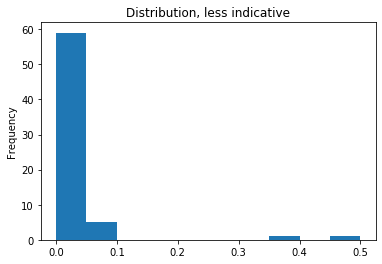

In [29]:
latest_df['recover rate'].plot.hist(title = 'Distribution, less indicative') # not much meaningful data is biased by many cases with very few confirmed case
print('Percentage over total confirmed cases: {0:.2%}'.format(latest_df.Recovered.sum() / latest_df.Confirmed.sum())) # ratio overall is more indicative

#### Alternative method choose worksheet before merging

In [30]:
xl = pd.ExcelFile(file_path)
xl.sheet_names

['Jan31_7pm',
 'Jan31_2pm',
 'Jan30_930pm',
 'Jan30_11am',
 'Jan29_9pm',
 'Jan29_230pm',
 'Jan29_130pm',
 'Jan28_11pm',
 'Jan28_6pm',
 'Jan28_1pm',
 'Jan27_830pm',
 'Jan27_7pm',
 'Jan27_9am',
 'Jan26_11pm',
 'Jan26_11am',
 'Jan25_10pm',
 'Jan25_12pm',
 'Jan25_12am',
 'Jan24_12pm',
 'Jan24_12am',
 'Jan23_12pm',
 'Jan22_12pm',
 'Jan22_12am']

In [31]:
# use the latest time for each date
split_name_df = pd.DataFrame(data = list(map(lambda x: x.split('_'), xl.sheet_names)), columns =['date','hour'])
split_name_df

,date,hour
0,Jan31,7pm
1,Jan31,2pm
2,Jan30,930pm
3,Jan30,11am
4,Jan29,9pm
5,Jan29,230pm
6,Jan29,130pm
7,Jan28,11pm
8,Jan28,6pm
9,Jan28,1pm


In [32]:
# extract time components
split_name_df['suffix'] = split_name_df.hour.apply(lambda x: x[-2:])

split_name_df['hour_digit'] = split_name_df.hour.str.extract(r'(?P<hour>[\d]+)')

split_name_df['date_digit'] = split_name_df.date.str.extract('([\d]+)').astype(int)

In [33]:
# deal with special case of 12am and half-hour

split_name_df.loc[split_name_df.hour == '12am', 'date_digit'] = split_name_df.loc[split_name_df.hour == '12am', 'date_digit'] - 1

split_name_df['hour_digit'] = split_name_df.hour_digit.str.replace('30','').astype(int)

split_name_df.loc[split_name_df.hour == '12am', 'hour_digit'] = 24

split_name_df.loc[split_name_df.hour == '12am', 'suffix'] = 'pm'

In [34]:
# filter for the last file for each day

filter_name_df = split_name_df[split_name_df.suffix == 'pm']

filter_name_df = filter_name_df.groupby('date_digit').agg({'hour_digit':'max','suffix': 'max'}).reset_index()

filter_name_df

,date_digit,hour_digit,suffix
0,21,24,pm
1,22,12,pm
2,23,24,pm
3,24,24,pm
4,25,12,pm
5,26,11,pm
6,27,8,pm
7,28,11,pm
8,29,9,pm
9,30,9,pm


In [35]:
filter_name_df = pd.merge(split_name_df,filter_name_df, how = 'right', 
         left_on = ['date_digit', 'hour_digit','suffix'], right_on = ['date_digit','hour_digit','suffix'])

filter_name = (filter_name_df.date + '_' + filter_name_df.hour).to_list()
filter_name

['Jan31_7pm',
 'Jan30_930pm',
 'Jan29_9pm',
 'Jan28_11pm',
 'Jan27_830pm',
 'Jan26_11pm',
 'Jan25_12pm',
 'Jan25_12am',
 'Jan24_12am',
 'Jan22_12pm',
 'Jan22_12am']

In [36]:
main_2_df = pd.concat(pd.read_excel(file_path, sheet_name= filter_name), ignore_index = True)

/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [37]:
main_2_df['Last Update'].value_counts()

2020-01-31 19:00:00    63
2020-01-30 21:30:00    59
2020-01-29 21:00:00    56
2020-01-27 20:30:00    52
2020-01-28 23:00:00    51
2020-01-26 23:00:00    47
2020-01-25 12:00:00    44
2020-01-25 00:00:00    44
2020-01-22 12:00:00    38
2020-01-24 00:00:00    38
2020-01-28 18:00:00     1
Name: Last Update, dtype: int64

In [38]:
# def read_excel_sheets(xls_path):
#     """Read all sheets of an Excel workbook and return a single DataFrame"""
#     print(f'Loading {xls_path} into pandas')
#     xl = pd.ExcelFile(xls_path)
#     df = pd.DataFrame()
#     columns = None
#     for idx, name in enumerate(xl.sheet_names):
#         print(f'Reading sheet #{idx}: {name}')
#         sheet = xl.parse(name)
#         if idx == 0:
#             # Save column names from the first sheet to match for append
#             columns = sheet.columns
#         sheet.columns = columns
#         # Assume index of existing data frame when appended
#         df = df.append(sheet, ignore_index=True)
#     return df

# read_excel_sheets(file_name)